In [1]:
import numpy as np
from numpy.lib.function_base import cov
import pandas as pd
import matplotlib.pyplot as plt

start_period = '2018-05-01'

from init import download_data, plot_line, plot_hist, plot_box

def get_AdjC(df):
    # returns a dataframe with 1 column: adj closes
    df_adj = df["Adj Close"]
    return df_adj

def compute_CCreturns(df, aggregation = "M", name=""):
    df_adj = df["Adj Close"]    # using only adj closes
    df_adj_op = df_adj.groupby(pd.Grouper(freq = aggregation))  # aggregation (default: monthly)
    df_adj = df_adj_op.mean()   # aggregate with avg
    df_returns = np.log(df_adj/df_adj.shift(1)) # calculating CC returns
    df_returns.name = name + " CC Return"
    
    # dropping na values
    return df_returns.dropna()

all_stocks = ["AAPL", "NVDA", "KO", "UL", "BAC", "AXP"]
dataframes = download_data(stocks = all_stocks, start_stream = start_period)

ccrs = {}
for s in all_stocks:
    ccrs[s] = compute_CCreturns(dataframes[s])

[] downloading AAPL	 -> Done
[] downloading NVDA	 -> Done
[] downloading KO	 -> Done
[] downloading UL	 -> Done
[] downloading BAC	 -> Done
[] downloading AXP	 -> Done


In [2]:
def descriptive_stats(df):
    ret = {}
    ret["mean"] = df.mean()
    ret["var"] = df.var()
    ret["std"] = df.std()
    ret["min"] = df.min()
    ret["max"] = df.max()
    ret["skew"] = df.skew()             # simmetry
    # skewness -> measures symmetry of a distribution around its mean
    #             = 0 symmetric (normal distribution)
    #             > 0 longer right tail than normal distribution
    #             < 0 longer left tail than normal distribution
    ret["kurt"] = df.kurtosis()     # thickness
    # kurtosis -> measures tail thickness of distribution
    #             > 0 tail fatter than normal distribution tail
    #             < 0 tail thinner than normal distribution tail
    #             = 0 tail as normal distribution tail
    ret["0.25"] = df.describe()[4]
    ret["0.50"] = df.describe()[5]  # median value
    ret["0.75"] = df.describe()[6]

    return ret


for s in all_stocks:
    tmp = descriptive_stats(compute_CCreturns(dataframes[s]))
    counter = 1
    print(str(s) + ' CC return stats')
    for t in tmp:
        print(str(counter) + ' & ' + str(t) + ' & ', end='')
        print('%.5f' % tmp[t], end='')
        print(' \\\\')
        counter += 1
    print()
    
# le tabelle sono stampate secondo la sintassi di latex per 
# poterle velocemente copiare e incollare nel report

AAPL CC return stats
1 & mean & 0.03288 \\
2 & var & 0.00765 \\
3 & std & 0.08749 \\
4 & min & -0.17011 \\
5 & max & 0.20639 \\
6 & skew & -0.68749 \\
7 & kurt & 0.54604 \\
8 & 0.25 & -0.00021 \\
9 & 0.50 & 0.04113 \\
10 & 0.75 & 0.10024 \\

NVDA CC return stats
1 & mean & 0.02760 \\
2 & var & 0.01292 \\
3 & std & 0.11366 \\
4 & min & -0.28104 \\
5 & max & 0.16703 \\
6 & skew & -1.30745 \\
7 & kurt & 1.10466 \\
8 & 0.25 & -0.03088 \\
9 & 0.50 & 0.06480 \\
10 & 0.75 & 0.10144 \\

KO CC return stats
1 & mean & 0.00808 \\
2 & var & 0.00232 \\
3 & std & 0.04819 \\
4 & min & -0.20274 \\
5 & max & 0.06923 \\
6 & skew & -3.07634 \\
7 & kurt & 13.11250 \\
8 & 0.25 & -0.01191 \\
9 & 0.50 & 0.01972 \\
10 & 0.75 & 0.03608 \\

UL CC return stats
1 & mean & 0.00639 \\
2 & var & 0.00161 \\
3 & std & 0.04016 \\
4 & min & -0.13845 \\
5 & max & 0.08613 \\
6 & skew & -1.41693 \\
7 & kurt & 5.27776 \\
8 & 0.25 & -0.01660 \\
9 & 0.50 & 0.01437 \\
10 & 0.75 & 0.02650 \\

BAC CC return stats
1 & mean & -0.0


AAPL


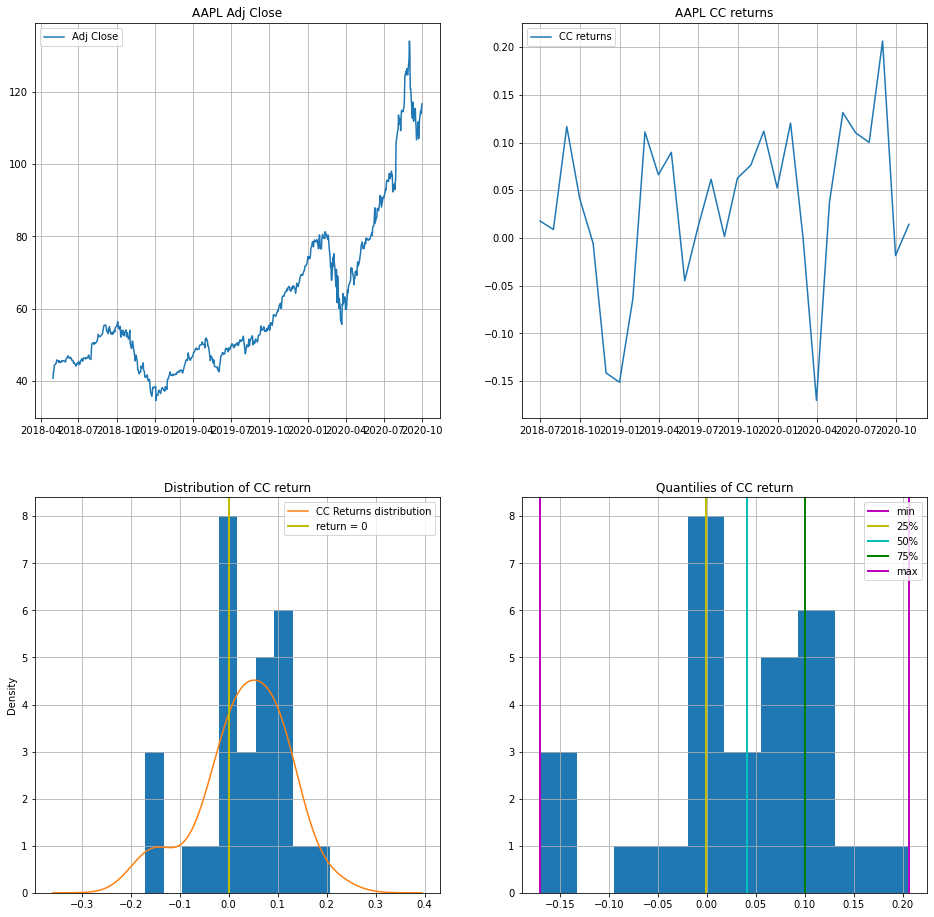

{'mean': 0.03288142128268267,
 'var': 0.007654800979020639,
 'std': 0.08749171948830722,
 'min': -0.17011409544376116,
 'max': 0.206390962488053,
 'skew': -0.687490677643878,
 'kurt': 0.5460391435224645,
 '0.25': -0.00021186923315891595,
 '0.50': 0.041126274264708995,
 '0.75': 0.10023512714038854}

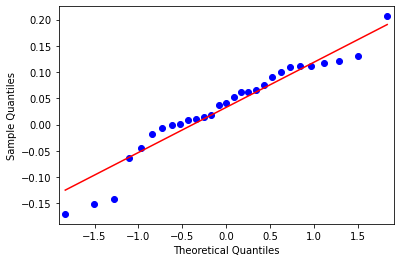

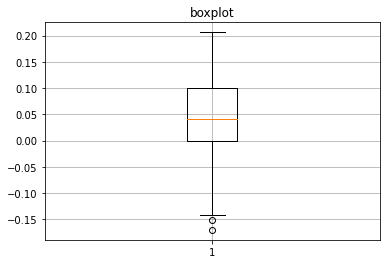


NVDA


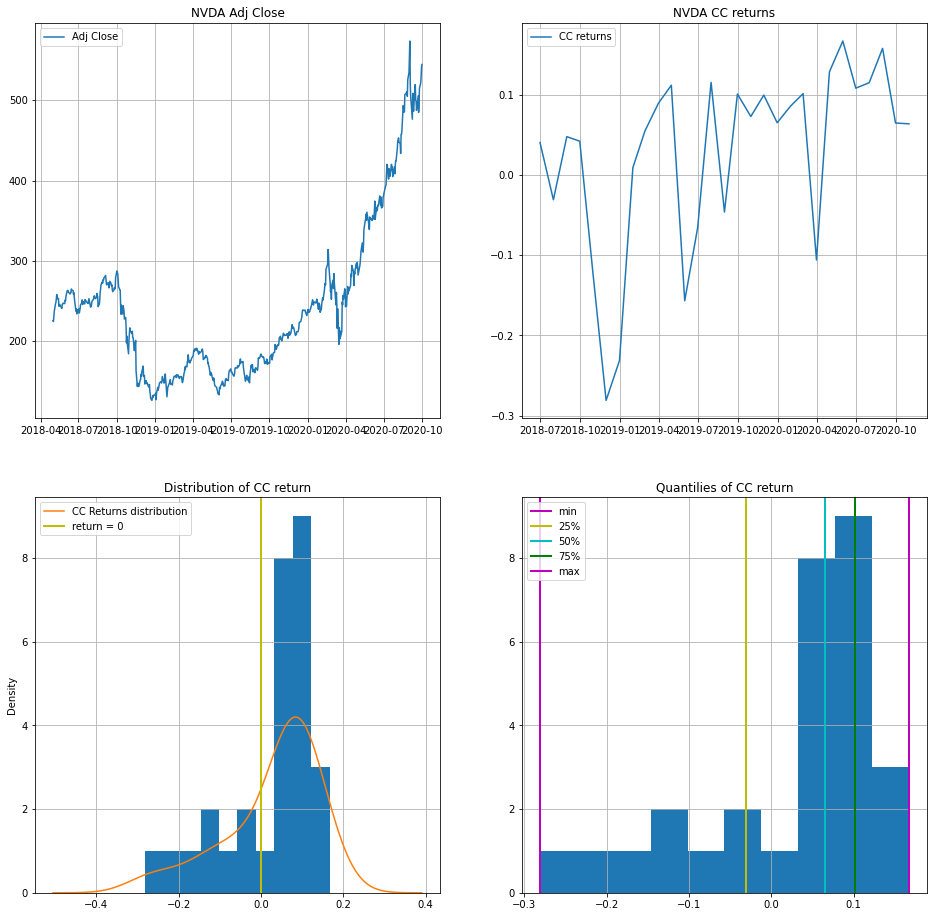

{'mean': 0.027596565230068627,
 'var': 0.012918600400144222,
 'std': 0.11366002111624043,
 'min': -0.28104099781058645,
 'max': 0.1670320886905489,
 'skew': -1.3074498269642896,
 'kurt': 1.104659623194268,
 '0.25': -0.03088312136644681,
 '0.50': 0.06480188626474576,
 '0.75': 0.10143688669844406}

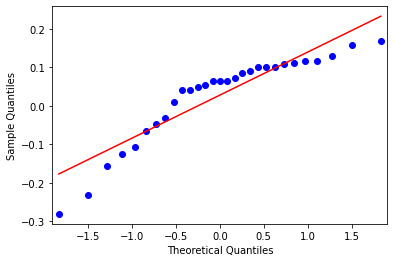

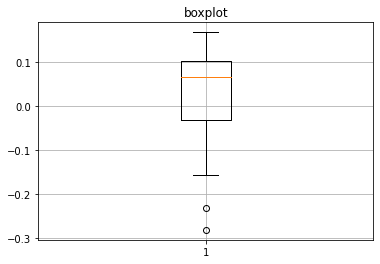


KO


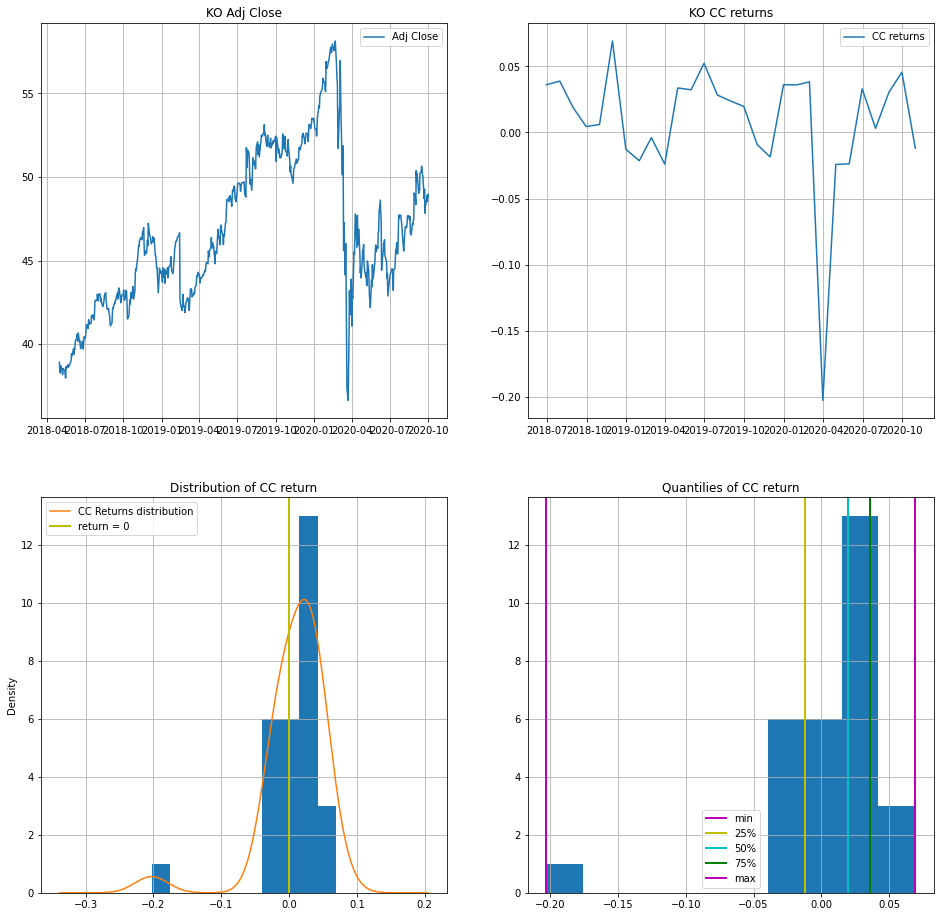

{'mean': 0.008079697202526577,
 'var': 0.0023218448847836656,
 'std': 0.04818552567715398,
 'min': -0.20273638851386824,
 'max': 0.06923059960693825,
 'skew': -3.0763436534439843,
 'kurt': 13.112500351534633,
 '0.25': -0.011910864962873162,
 '0.50': 0.01971598146481202,
 '0.75': 0.03608088743097576}

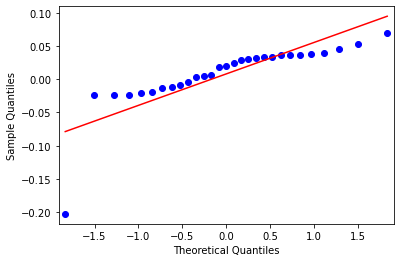

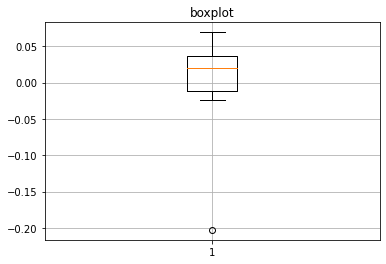


UL


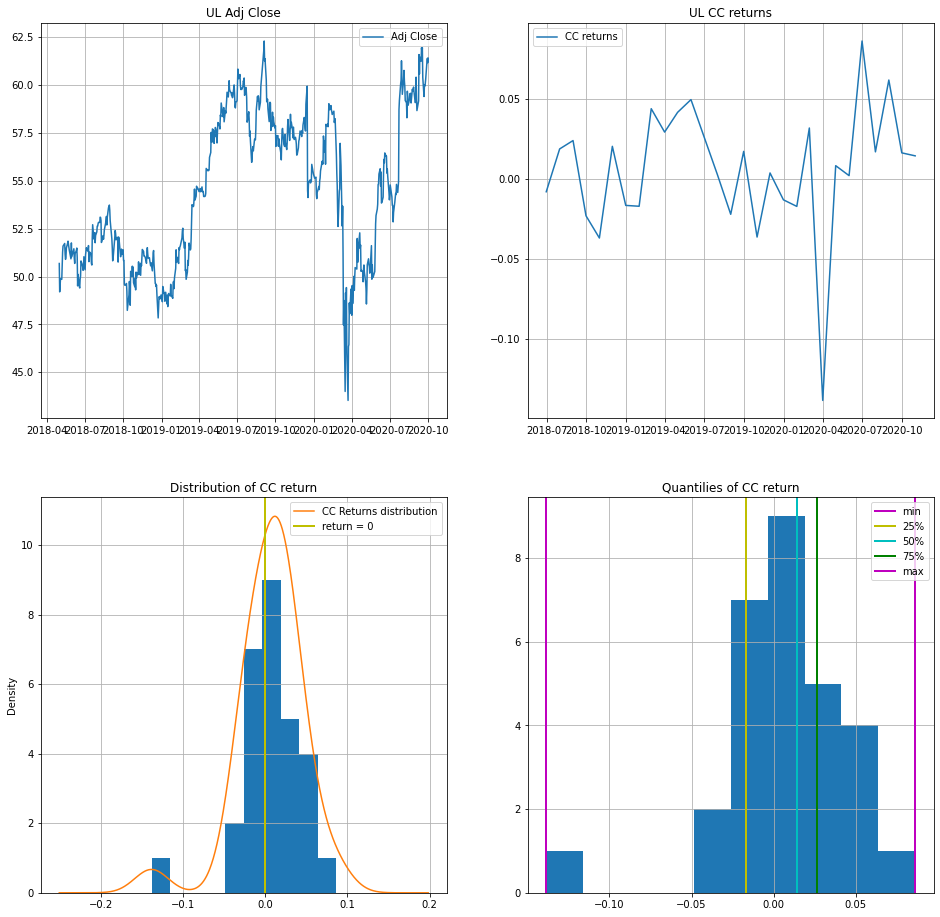

{'mean': 0.006391254651144977,
 'var': 0.0016131607422670325,
 'std': 0.04016417237124441,
 'min': -0.13844857215613995,
 'max': 0.0861258422762237,
 'skew': -1.4169290746328174,
 'kurt': 5.277757444024834,
 '0.25': -0.016600474001909758,
 '0.50': 0.014368402082357606,
 '0.75': 0.026498084233086562}

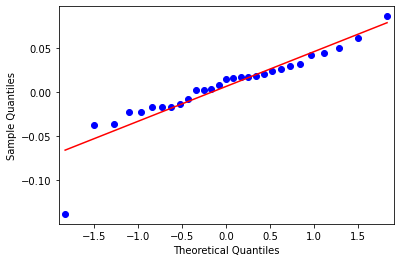

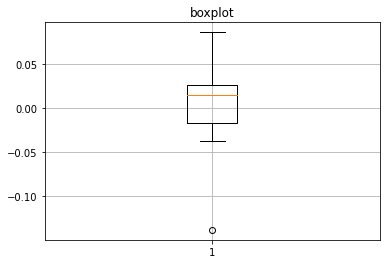


BAC


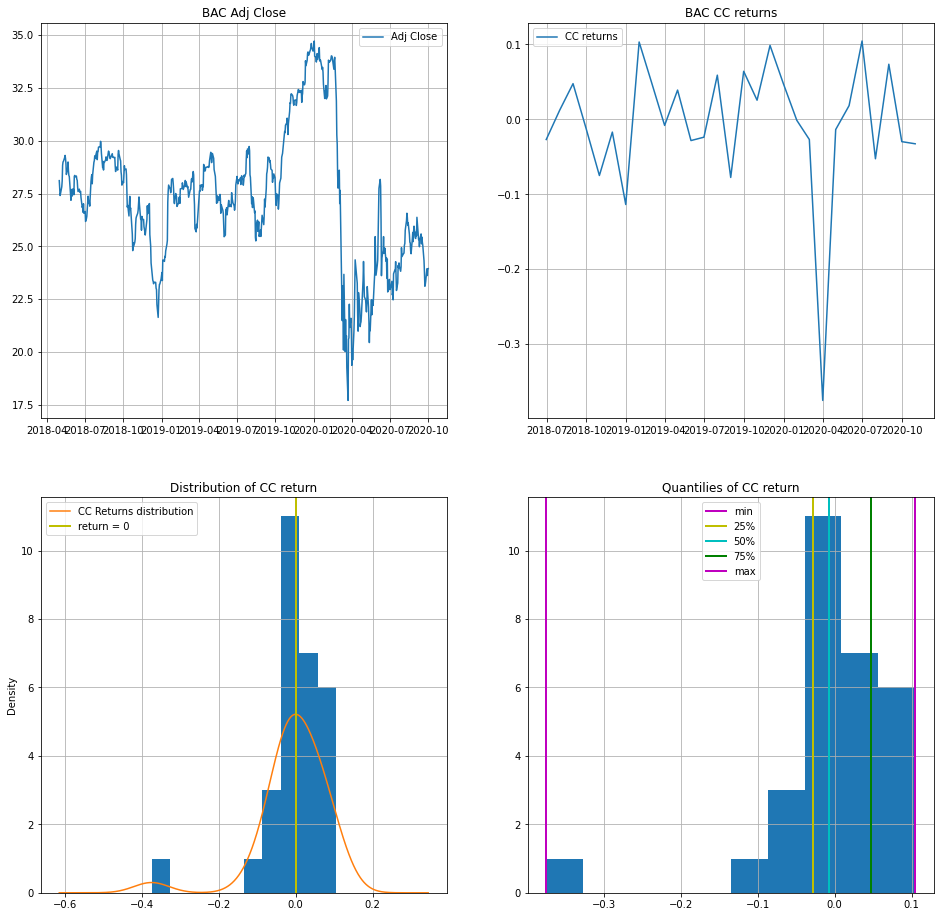

{'mean': -0.005810271246507309,
 'var': 0.008080537963642078,
 'std': 0.0898918125506549,
 'min': -0.3748182462849049,
 'max': 0.10452739983449809,
 'skew': -2.4739158849791942,
 'kurt': 9.700650953561667,
 '0.25': -0.02824768981550033,
 '0.50': -0.008032950786082784,
 '0.75': 0.04766144463821239}

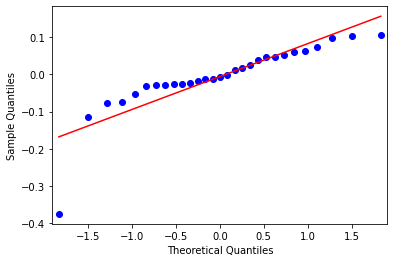

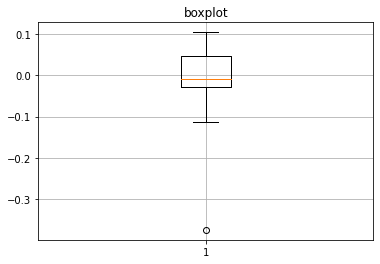


AXP


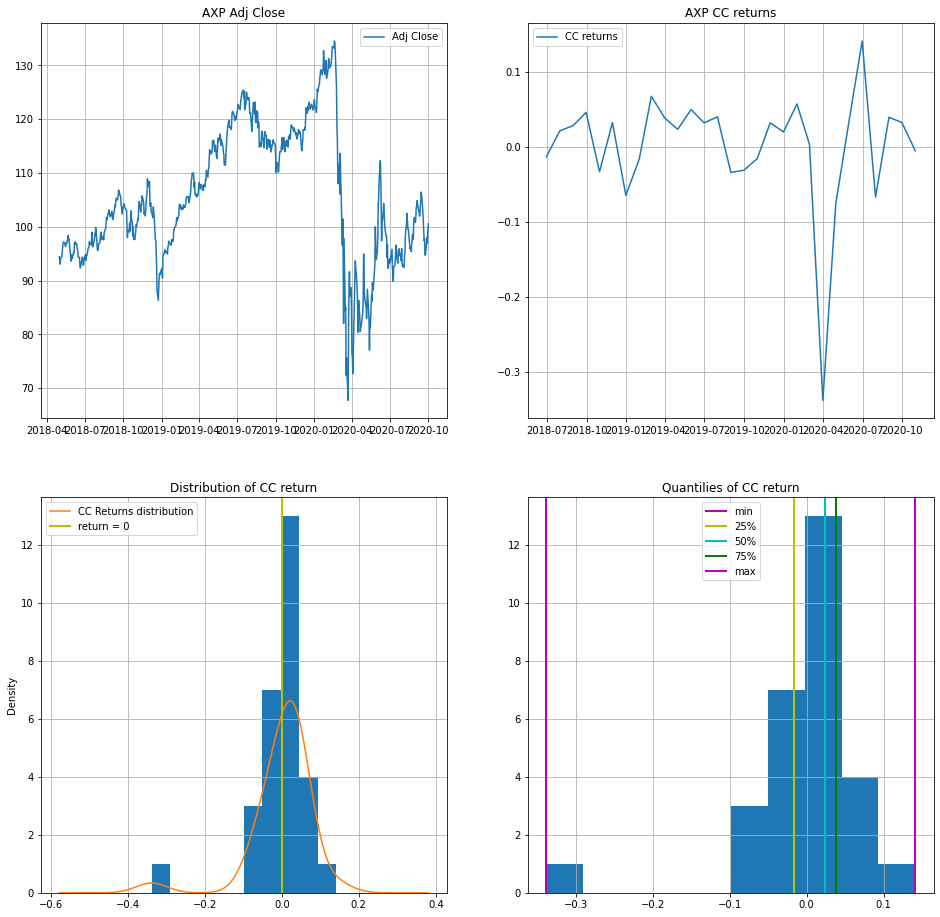

{'mean': 0.001625781155194947,
 'var': 0.006320194550360951,
 'std': 0.07949965125936687,
 'min': -0.33785330939915753,
 'max': 0.14107680520659788,
 'skew': -2.794606234381597,
 'kurt': 11.930281557810806,
 '0.25': -0.01625058404334643,
 '0.50': 0.023407567254365637,
 '0.75': 0.03840561878837711}

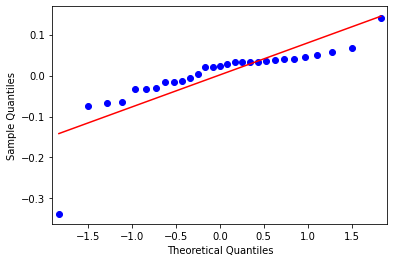

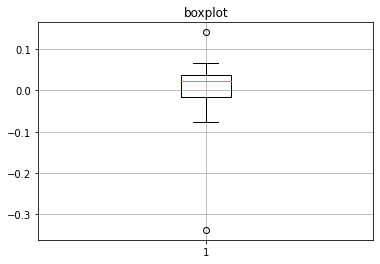

In [3]:
import statsmodels.api as sm

counter = 0
for s in all_stocks:
    plt.figure(figsize = (16, 16))
    print('\n' + s)
    plt.subplot(221)
    plt.title(s + ' Adj Close')
    plt.plot(get_AdjC(dataframes[s]), label = 'Adj Close')
    plt.grid()
    plt.legend()

    plt.subplot(222)
    plt.title(s + ' CC returns')
    plt.plot(ccrs[s], label = 'CC returns')
    plt.grid()
    plt.legend()

    plt.subplot(223)
    plt.hist(ccrs[s])
    ccrs[s].plot.density(label = "CC Returns distribution")
    plt.axvline(x=0, linewidth=2, color='y', label = "return = 0")
    plt.legend()
    plt.title('Distribution of CC return')
    plt.grid()

    plt.subplot(224)
    stat = descriptive_stats(ccrs[s])
    plt.hist(ccrs[s])
    plt.axvline(x=stat["min"], linewidth=2, color='m', label = "min")
    plt.axvline(x=stat["0.25"], linewidth=2, color='y', label = "25%")
    plt.axvline(x=stat["0.50"], linewidth=2, color='c', label = "50%")
    plt.axvline(x=stat["0.75"], linewidth=2, color='g', label = "75%")
    plt.axvline(x=stat["max"], linewidth=2, color='m', label = "max")
    plt.legend()
    plt.title('Quantilies of CC return')
    plt.grid()
    # plt.savefig('img1820/'+ str(counter+1) + '-all ' + s + '.png', dpi=300)
    plt.show()

    display(stat)

    sm.qqplot(ccrs[s], line = 's')
    # plt.savefig('img1820/'+ str(counter+2) + '-qqplot ' + s + '.png', dpi=300)
    plt.show()

    plt.figure()
    plt.boxplot(ccrs[s])
    plt.title("boxplot")
    plt.grid()
    # plt.savefig('img1820/'+ str(counter+3) + '-boxplot ' + s + '.png', dpi=300)
    plt.show()
    
    counter += 3